In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

In [2]:
df = pd.read_csv('Hitters.csv')
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
df.isna().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer

nullcol=['Salary']
nullimputer = SimpleImputer(strategy='mean')
df[nullcol] = nullimputer.fit_transform(df[nullcol])
df.isna().sum().sum()

0

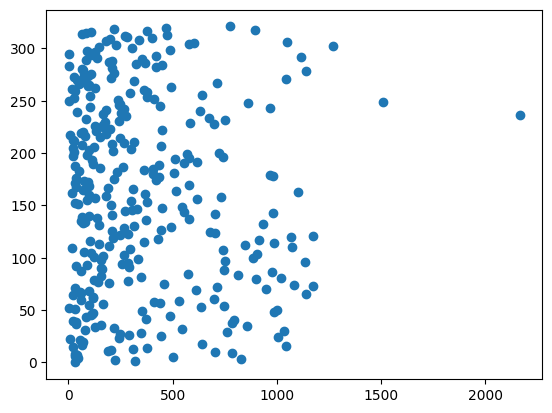

In [6]:
plt.scatter(df['CRuns'],df.index)
plt.show()

In [8]:
data=df[['CRuns']]
sc = StandardScaler()
scaled_data = sc.fit_transform(data)

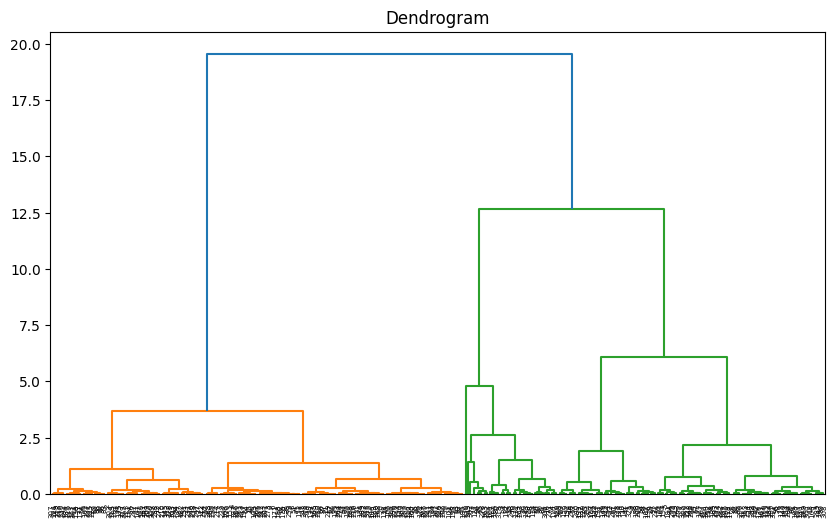

In [10]:
plt.figure(figsize=(10,6))
plt.title("Dendrogram")
dend = shc.dendrogram(shc.linkage(scaled_data,method='ward'))

In [12]:
cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
pred = cluster.fit_predict(scaled_data)

c:\Python310\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [14]:
pred

array([1, 0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1,
       1, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 2, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 0, 2, 1, 0, 2, 2, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 0, 2, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 0, 1,
       2, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1,
       1, 2, 1, 0, 1, 1, 2, 2, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 0,

In [15]:
df['Cluster'] =pred
df['Cluster'].value_counts()

Cluster
1    172
0    111
2     39
Name: count, dtype: int64

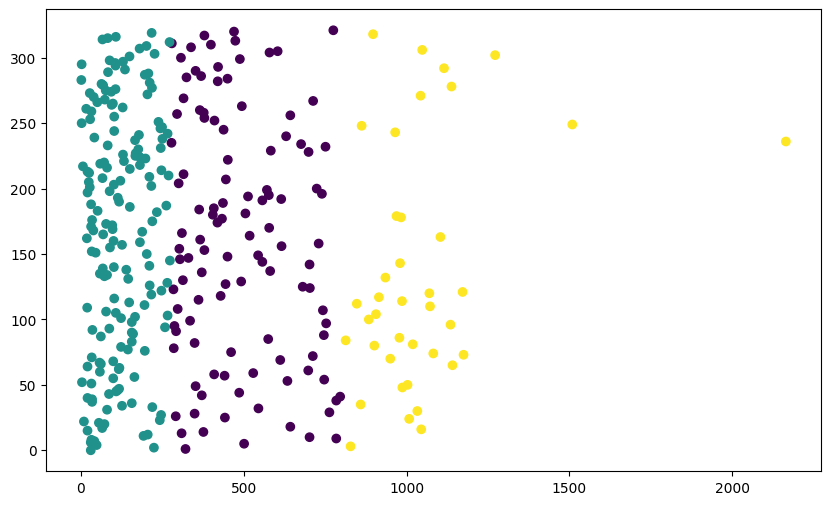

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(data,data.index,c=df['Cluster'])
plt.show()